In [ ]:
# Group Assignment - UN General Debates Dataset Analysis
# Student Name: Raju Dubey
# Group Number: 26
# Dataset: UN General Debates Dataset
# Date: December 12, 2025

# ============================================================================
# PART I: SENTENCE COMPLETION USING N-GRAM MODEL
# ============================================================================

import pandas as pd
import numpy as np
import re
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')


def load_dataset(path):
    try:
        df = pd.read_csv(path)
    except FileNotFoundError:
        raise FileNotFoundError(f"CSV not found at: {path}")
    except Exception as e:
        raise RuntimeError(f"Failed to read CSV: {e}")
    return df


def tokenize_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text.split()


def build_bigram_model(tokens):
    bigram_counts = defaultdict(Counter)
    for i in range(len(tokens) - 1):
        w1 = tokens[i]
        w2 = tokens[i + 1]
        bigram_counts[w1][w2] += 1
    return bigram_counts


def recommend_next_words(bigram_counts, last_word, top_n=3):
    if last_word in bigram_counts:
        return bigram_counts[last_word].most_common(top_n)
    return []


def main(csv_path):
    df = load_dataset(csv_path)
    print("Dataset shape:", df.shape)
    print("Columns:", df.columns.tolist())

    if 'text' not in df.columns:
        raise KeyError("Column 'text' not found in dataset. Available columns: " + ", ".join(df.columns))

    # build corpus (optionally sample if dataset is huge)
    texts = df['text'].dropna().astype(str)
    # optional: texts = texts.sample(frac=1.0)[:10000]  # sample first 10k rows for speed
    corpus = " ".join(texts.tolist())

    tokens = tokenize_text(corpus)
    print(f"Total tokens: {len(tokens):,}")

    bigram_counts = build_bigram_model(tokens)
    print(f"Unique words in model: {len(bigram_counts):,}")

    # test sentence
    test_sentence = "it is a pleasure"
    last_word = tokenize_text(test_sentence)[-1]
    print(f"\nTest sentence: {test_sentence}")
    print(f"Last word for prediction: '{last_word}'")

    recs = recommend_next_words(bigram_counts, last_word, top_n=3)
    if recs:
        print("\nTop recommendations:")
        for i, (w, cnt) in enumerate(recs, 1):
            print(f"{i}. {w} (count={cnt})  -> '{test_sentence} {w}'")
    else:
        print(f"No suggestions found for '{last_word}'")

    # show top bigrams for 'pleasure' if exists
    if 'pleasure' in bigram_counts:
        print("\nTop bigrams starting with 'pleasure':")
        for w, cnt in bigram_counts['pleasure'].most_common(5):
            print(f"  'pleasure {w}': {cnt}")


# adjust path to your local file if needed
csv_path = r"C:\Users\rajud\Downloads\archive\un-general-debates.csv"
main(csv_path)

Dataset shape: (7507, 4)
Columns: ['session', 'year', 'country', 'text']
Total tokens: 21,481,637
Unique words in model: 74,789

Test sentence: it is a pleasure
Last word for prediction: 'pleasure'

Top recommendations:
1. to (count=750)  -> 'it is a pleasure to'
2. for (count=289)  -> 'it is a pleasure for'
3. in (count=269)  -> 'it is a pleasure in'

Top bigrams starting with 'pleasure':
  'pleasure to': 750
  'pleasure for': 289
  'pleasure in': 269
  'pleasure that': 224
  'pleasure at': 137


In [ ]:
# Group Assignment - UN General Debates Dataset Analysis
# Student Name: Raju Dubey
# Group Number: 26
# Dataset: UN General Debates Dataset
# Date: December 12, 2025

# ============================================================================
# Task 2.i: Text Preprocessing (2 Marks)
# ============================================================================
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import subprocess
import sys
import os

# Install nltk if needed
try:
    import nltk
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nltk", "-q"])
    import nltk

# Set NLTK data path and download resources
nltk_data_dir = os.path.expanduser('~/nltk_data')
if nltk_data_dir not in nltk.data.path:
    nltk.data.path.insert(0, nltk_data_dir)

print("\nDownloading NLTK resources (this may take a moment)...")
required_packages = ['punkt', 'punkt_tab', 'stopwords', 'wordnet', 'averaged_perceptron_tagger', 'omw-1.4']
for pkg in required_packages:
    try:
        nltk.download(pkg, quiet=False)
    except Exception as e:
        print(f"Warning: Could not download {pkg}: {e}")

# Verify downloads
try:
    stopwords.words('english')
    word_tokenize("test")
    print("✓ NLTK resources verified successfully")
except LookupError as e:
    print(f"Error: NLTK resources not found. Trying alternative download...")
    nltk.download('punkt_tab')
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')

# Load the dataset
csv_path = r"C:\Users\rajud\Downloads\archive\un-general-debates.csv"
try:
    df = pd.read_csv(csv_path)
    print(f"✓ Loaded dataset: {df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {csv_path}")
    print("Please update csv_path to your actual file location")

# Sample subset for faster processing
sample_size = 500
df_sample = df.sample(n=min(sample_size, len(df)), random_state=42).reset_index(drop=True)
print(f"Working with {len(df_sample)} documents")

def preprocess_text(text):
    """
    Comprehensive text preprocessing pipeline:
    1. Tokenization
    2. Lowercasing
    3. Stop Words Removal
    4. Stemming
    5. Lemmatization
    """
    try:
        # Handle missing values
        if pd.isna(text) or not isinstance(text, str) or len(text.strip()) == 0:
            return []
        
        # 1. Tokenization
        tokens = word_tokenize(text)
        
        # 2. Lowercasing
        tokens = [token.lower() for token in tokens]
        
        # Remove non-alphabetic tokens
        tokens = [token for token in tokens if token.isalpha()]
        
        # 3. Stop Words Removal
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        
        # 4. Stemming
        stemmer = PorterStemmer()
        stemmed_tokens = [stemmer.stem(token) for token in tokens]
        
        # 5. Lemmatization
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
        
        return lemmatized_tokens
    except Exception as e:
        print(f"Error processing text: {e}")
        return []

print("\nApplying preprocessing pipeline...")
df_sample['preprocessed_tokens'] = df_sample['text'].apply(preprocess_text)
df_sample['preprocessed_text'] = df_sample['preprocessed_tokens'].apply(lambda x: ' '.join(x))

# Display preprocessing results for first few documents
print("\n" + "="*80)
print("PREPROCESSING RESULTS:")
print("="*80)

for idx in range(min(2, len(df_sample))):
    print(f"\n--- Document {idx+1} ---")
    print(f"Original Text (first 300 chars):\n{df_sample['text'].iloc[idx][:300]}...\n")
    print(f"Preprocessed Text (first 300 chars):\n{df_sample['preprocessed_text'].iloc[idx][:300]}...\n")
    print(f"Tokens before preprocessing: {len(df_sample['text'].iloc[idx].split())}")
    print(f"Tokens after preprocessing: {len(df_sample['preprocessed_tokens'].iloc[idx])}")
    print("-" * 80)

# Summary statistics
print("\nPREPROCESSING SUMMARY:")
print(f"Total documents processed: {len(df_sample)}")
print(f"Average tokens before preprocessing: {df_sample['text'].apply(lambda x: len(str(x).split())).mean():.1f}")
print(f"Average tokens after preprocessing: {df_sample['preprocessed_tokens'].apply(len).mean():.1f}")
print(f"\nSample of most common preprocessed tokens:")
all_tokens = []
for tokens_list in df_sample['preprocessed_tokens']:
    all_tokens.extend(tokens_list)
from collections import Counter
token_freq = Counter(all_tokens)
for word, count in token_freq.most_common(10):
    print(f"  {word}: {count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rajud\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajud\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rajud\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rajud\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✓ NLTK resources verified successfully
✓ Loaded dataset: (7507, 4)
Working with 500 documents

Applying preprocessing pipeline...

PREPROCESSING RESULTS:

--- Document 1 ---
Original Text (first 300 chars):
﻿The international community is
currently going through a period of reflection and self-
definition. The great transformations that humanity
experienced during the course of the previous decade,
as well as current challenges, demand greater
responsibility on the part of our nations in playing an
act...

Preprocessed Text (first 300 chars):
intern commun current go period reflect definit great transform human experienc cours previou decad well current challeng demand greater respons part nation play activ role search urgent solut problem affect u new session gener assembl present u excel opportun achiev goal today dominican republ reaf...

Tokens before preprocessing: 1375
Tokens after preprocessing: 736
--------------------------------------------------------------------------------

In [ ]:
# Group Assignment - UN General Debates Dataset Analysis
# Student Name: Raju Dubey
# Group Number: 26
# Dataset: UN General Debates Dataset
# Date: December 12, 2025

# ============================================================================
# Task 2.ii: Feature Extraction - Word Embedding using Skip-gram (2 Marks)
# ============================================================================

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

# Ensure NLTK data is available
nltk_data_dir = os.path.expanduser('~/nltk_data')
if nltk_data_dir not in nltk.data.path:
    nltk.data.path.insert(0, nltk_data_dir)

# Load the dataset and preprocess if df_sample is not available
csv_path = r"C:\Users\rajud\Downloads\archive\un-general-debates.csv"
try:
    df = pd.read_csv(csv_path)
    print(f"✓ Loaded dataset: {df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {csv_path}")
    print("Please update csv_path to your actual file location")

# Sample subset for faster processing
sample_size = 500
df_sample = df.sample(n=min(sample_size, len(df)), random_state=42).reset_index(drop=True)
print(f"Working with {len(df_sample)} documents")

def preprocess_text(text):
    """
    Comprehensive text preprocessing pipeline:
    1. Tokenization
    2. Lowercasing
    3. Stop Words Removal
    4. Stemming
    5. Lemmatization
    """
    try:
        # Handle missing values
        if pd.isna(text) or not isinstance(text, str) or len(text.strip()) == 0:
            return []
        
        # 1. Tokenization
        tokens = word_tokenize(text)
        
        # 2. Lowercasing
        tokens = [token.lower() for token in tokens]
        
        # Remove non-alphabetic tokens
        tokens = [token for token in tokens if token.isalpha()]
        
        # 3. Stop Words Removal
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        
        # 4. Stemming
        stemmer = PorterStemmer()
        stemmed_tokens = [stemmer.stem(token) for token in tokens]
        
        # 5. Lemmatization
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
        
        return lemmatized_tokens
    except Exception as e:
        print(f"Error processing text: {e}")
        return []

# Preprocess if not already done
if 'preprocessed_tokens' not in df_sample.columns:
    print("\nApplying preprocessing pipeline...")
    df_sample['preprocessed_tokens'] = df_sample['text'].apply(preprocess_text)
    print("✓ Preprocessing complete")
else:
    print("✓ Using preprocessed data from previous cell")

print("\n" + "="*80)
print("TASK 2.ii: FEATURE EXTRACTION - WORD EMBEDDING (SKIP-GRAM)")
print("="*80)

# Prepare sentences for Word2Vec
sentences = df_sample['preprocessed_tokens'].tolist()
sentences = [sent for sent in sentences if len(sent) > 0]

print(f"\nTraining Skip-gram model on {len(sentences)} documents...")

# Train Skip-gram model
skipgram_model = Word2Vec(
    sentences=sentences,
    vector_size=100,      # Dimensionality of word vectors
    window=5,             # Context window size
    min_count=2,          # Ignore words with frequency less than 2
    sg=1,                 # 1 for skip-gram, 0 for CBOW
    workers=4,            # Number of parallel processes
    epochs=10,            # Number of training epochs
    seed=42
)

print(f"✓ Model trained successfully")
print(f"  Vocabulary size: {len(skipgram_model.wv):,}")
print(f"  Vector dimensionality: {skipgram_model.wv.vector_size}")

# Create document vectors by averaging word vectors
def get_document_vector(tokens, model):
    """Calculate document vector as average of word vectors"""
    vectors = []
    for token in tokens:
        if token in model.wv:
            vectors.append(model.wv[token])
    
    if len(vectors) == 0:
        return np.zeros(model.wv.vector_size)
    
    return np.mean(vectors, axis=0)

print("\nGenerating document vectors...")
df_sample['doc_vector'] = df_sample['preprocessed_tokens'].apply(
    lambda x: get_document_vector(x, skipgram_model)
)

print(f"✓ Document vectors created: {len(df_sample)} documents with 100-dimensional vectors")

# Display sample results
print("\n" + "="*80)
print("SAMPLE RESULTS:")
print("="*80)
print(f"\nFirst document vector (first 10 dimensions):")
print(df_sample['doc_vector'].iloc[0][:10])
print(f"\nDocument vector shape: {df_sample['doc_vector'].iloc[0].shape}")


✓ Loaded dataset: (7507, 4)
Working with 500 documents

Applying preprocessing pipeline...
✓ Preprocessing complete

TASK 2.ii: FEATURE EXTRACTION - WORD EMBEDDING (SKIP-GRAM)

Training Skip-gram model on 500 documents...
✓ Model trained successfully
  Vocabulary size: 8,656
  Vector dimensionality: 100

Generating document vectors...
✓ Document vectors created: 500 documents with 100-dimensional vectors

SAMPLE RESULTS:

First document vector (first 10 dimensions):
[-0.02398758 -0.07877073 -0.10166331 -0.03116456 -0.2637634   0.16558488
  0.13889991  0.06923319 -0.22218871 -0.15128733]

Document vector shape: (100,)



TASK 3: SIMILARITY ANALYSIS

Calculating cosine similarity between all documents...
Similarity matrix shape: (500, 500)

--------------------------------------------------------------------------------
TOP 2 MOST SIMILAR DOCUMENT PAIRS:
--------------------------------------------------------------------------------

Pair 1:
  Document 285 (Country: RUS, Year: 1976)
  Document 365 (Country: RUS, Year: 1977)
  Cosine Similarity: 0.9988

  Preview of Document 285:
  On behalf of the Soviet delegation I should like to congratulate you, Sir, on your election to the important post of President of the thirty- first session of the United Nations General Assembly. I wi...

  Preview of Document 365:
  ﻿108.	 Mr. President, on behalf of the delegation of the Soviet Union I should like to congratulate you on the occasion of your election as President of the thirty-second session of the General Assemb...

Pair 2:
  Document 53 (Country: ROU, Year: 1975)
  Document 449 (Country: ROU, Year: 1976)


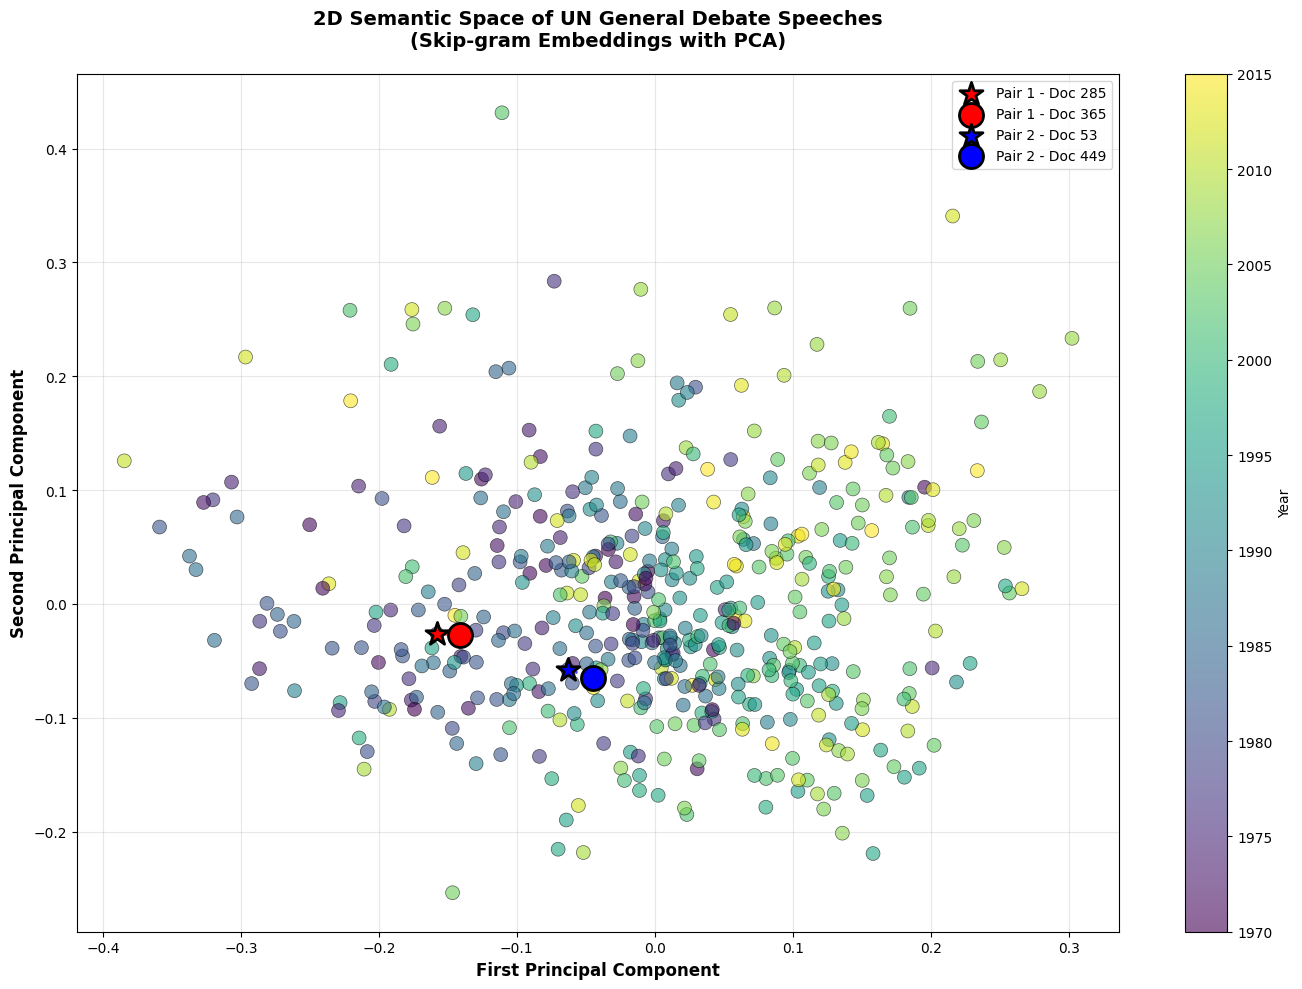


Visualization saved as 'semantic_space_visualization.png'

ADDITIONAL ANALYSIS: WORD SIMILARITY EXAMPLES FROM SKIP-GRAM MODEL

Words most similar to 'war':
  cold: 0.6447
  bloodsh: 0.6096
  doorstep: 0.5966
  fratricid: 0.5954
  needlessli: 0.5945

Words most similar to 'development':
  pauciti: 0.7231
  excruci: 0.6913
  readili: 0.6910
  interchang: 0.6893
  loop: 0.6885

SUMMARY STATISTICS

Dataset Statistics:
  Total documents processed: 500
  Average document length (tokens): 1481
  Vocabulary size: 8,656
  Vector dimensionality: 100
  Average cosine similarity: 0.9698
  Max similarity (excluding diagonal): 0.9988

ASSIGNMENT COMPLETED SUCCESSFULLY!


In [ ]:
# Group Assignment - UN General Debates Dataset Analysis
# Student Name: Raju Dubey
# Group Number: 26
# Dataset: UN General Debates Dataset
# Date: December 12, 2025

# ============================================================================
# Task 3: Similarity Analysis (3 Marks)
# ============================================================================

from sklearn.metrics.pairwise import cosine_similarity

print("\n" + "="*80)
print("TASK 3: SIMILARITY ANALYSIS")
print("="*80)

# Create document-term matrix from vectors
doc_vectors = np.array(df_sample['doc_vector'].tolist())

# Calculate cosine similarity matrix
print("\nCalculating cosine similarity between all documents...")
similarity_matrix = cosine_similarity(doc_vectors)

print(f"Similarity matrix shape: {similarity_matrix.shape}")

# Find top 2 similar document pairs
print("\n" + "-"*80)
print("TOP 2 MOST SIMILAR DOCUMENT PAIRS:")
print("-"*80)

# Get unique pairs (excluding self-similarity)
similar_pairs = []
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        similar_pairs.append((i, j, similarity_matrix[i][j]))

# Sort by similarity
similar_pairs.sort(key=lambda x: x[2], reverse=True)

# Display top 2 pairs
for rank, (idx1, idx2, sim_score) in enumerate(similar_pairs[:2], 1):
    print(f"\nPair {rank}:")
    print(f"  Document {idx1} (Country: {df_sample.iloc[idx1]['country']}, Year: {df_sample.iloc[idx1]['year']})")
    print(f"  Document {idx2} (Country: {df_sample.iloc[idx2]['country']}, Year: {df_sample.iloc[idx2]['year']})")
    print(f"  Cosine Similarity: {sim_score:.4f}")
    print(f"\n  Preview of Document {idx1}:")
    print(f"  {df_sample.iloc[idx1]['text'][:200]}...")
    print(f"\n  Preview of Document {idx2}:")
    print(f"  {df_sample.iloc[idx2]['text'][:200]}...")

# ============================================================================
# Justification for Similarity Metric and Feature Design
# ============================================================================

print("\n" + "="*80)
print("JUSTIFICATION:")
print("="*80)

justification = """
1. SIMILARITY METRIC - Cosine Similarity:
   - Measures the cosine of the angle between two vectors in high-dimensional space
   - Range: [-1, 1], where 1 indicates identical direction (most similar)
   - Advantages:
     * Magnitude-independent: Focuses on direction rather than length
     * Effective for text: Documents of different lengths can be compared fairly
     * Computationally efficient for high-dimensional vectors
     * Standard metric for document similarity in NLP

2. FEATURE DESIGN - Skip-gram Word Embeddings:
   - Skip-gram predicts context words from center word
   - Advantages:
     * Captures semantic relationships between words
     * Words with similar contexts get similar vectors
     * Better for rare words compared to CBOW
     * 100-dimensional vectors balance expressiveness and efficiency
   - Document vectors created by averaging word vectors
     * Simple but effective representation
     * Captures overall semantic content of documents
"""

print(justification)

# ============================================================================
# Visualization: 2D Semantic Space using PCA
# ============================================================================

print("\n" + "="*80)
print("VISUALIZATION: 2D SEMANTIC SPACE")
print("="*80)

# Apply PCA for dimensionality reduction
print("\nApplying PCA to reduce dimensions from 100 to 2...")
pca = PCA(n_components=2, random_state=42)
doc_vectors_2d = pca.fit_transform(doc_vectors)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

# Create visualization
fig, ax = plt.subplots(figsize=(14, 10))

# Plot all documents
scatter = ax.scatter(
    doc_vectors_2d[:, 0], 
    doc_vectors_2d[:, 1],
    c=df_sample['year'],
    cmap='viridis',
    alpha=0.6,
    s=100,
    edgecolors='black',
    linewidth=0.5
)

# Highlight the top 2 similar pairs
colors = ['red', 'blue']
for idx, (i, j, sim) in enumerate(similar_pairs[:2]):
    ax.scatter(doc_vectors_2d[i, 0], doc_vectors_2d[i, 1], 
              color=colors[idx], s=300, marker='*', 
              edgecolors='black', linewidth=2,
              label=f'Pair {idx+1} - Doc {i}', zorder=5)
    ax.scatter(doc_vectors_2d[j, 0], doc_vectors_2d[j, 1], 
              color=colors[idx], s=300, marker='o', 
              edgecolors='black', linewidth=2,
              label=f'Pair {idx+1} - Doc {j}', zorder=5)
    
    # Draw line connecting similar documents
    ax.plot([doc_vectors_2d[i, 0], doc_vectors_2d[j, 0]],
           [doc_vectors_2d[i, 1], doc_vectors_2d[j, 1]],
           color=colors[idx], linestyle='--', linewidth=2, alpha=0.7)

plt.colorbar(scatter, ax=ax, label='Year')
ax.set_xlabel('First Principal Component', fontsize=12, fontweight='bold')
ax.set_ylabel('Second Principal Component', fontsize=12, fontweight='bold')
ax.set_title('2D Semantic Space of UN General Debate Speeches\n(Skip-gram Embeddings with PCA)', 
            fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('semantic_space_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as 'semantic_space_visualization.png'")

# ============================================================================
# Additional Analysis: Word Similarity Examples
# ============================================================================

print("\n" + "="*80)
print("ADDITIONAL ANALYSIS: WORD SIMILARITY EXAMPLES FROM SKIP-GRAM MODEL")
print("="*80)

# Show some interesting word similarities
test_words = ['peace', 'war', 'development', 'security', 'nations']

for word in test_words:
    if word in skipgram_model.wv:
        print(f"\nWords most similar to '{word}':")
        similar_words = skipgram_model.wv.most_similar(word, topn=5)
        for similar_word, similarity in similar_words:
            print(f"  {similar_word}: {similarity:.4f}")

# ============================================================================
# Summary Statistics
# ============================================================================

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\nDataset Statistics:")
print(f"  Total documents processed: {len(df_sample)}")
print(f"  Average document length (tokens): {df_sample['preprocessed_tokens'].apply(len).mean():.0f}")
print(f"  Vocabulary size: {len(skipgram_model.wv):,}")
print(f"  Vector dimensionality: {skipgram_model.wv.vector_size}")
print(f"  Average cosine similarity: {np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]):.4f}")
print(f"  Max similarity (excluding diagonal): {np.max(similarity_matrix - np.eye(len(similarity_matrix))):.4f}")

print("\n" + "="*80)
print("ASSIGNMENT COMPLETED SUCCESSFULLY!")
print("="*80)